# Clasification

In [9]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_classification

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

# Import validation
from sklearn.model_selection import train_test_split

(1000, 2) (1000,)
(800, 2) (800,) (200, 2) (200,)


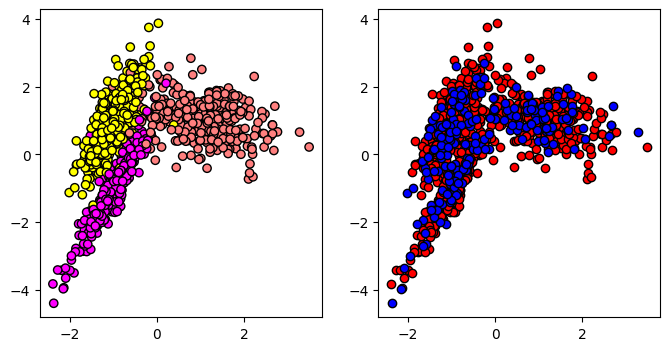

In [10]:
# we create 100 separable points
X, y = make_classification(n_samples = 1000, n_features=2, n_classes = 3, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=6)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

# Plot train / test data
print(X.shape,y.shape)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
_,axes=plt.subplots(1,2,figsize=(8,4))
axes[0].scatter(X[:,0],X[:,1], c=y, cmap='spring',edgecolors='k')
axes[1].scatter(X_train[:,0],X_train[:,1],c='r',edgecolors='k')
axes[1].scatter(X_test[:,0],X_test[:,1],c='b',edgecolors='k')

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%run "/content/drive/MyDrive/Repositorio/machine_learning/Fun_Lp.ipynb"

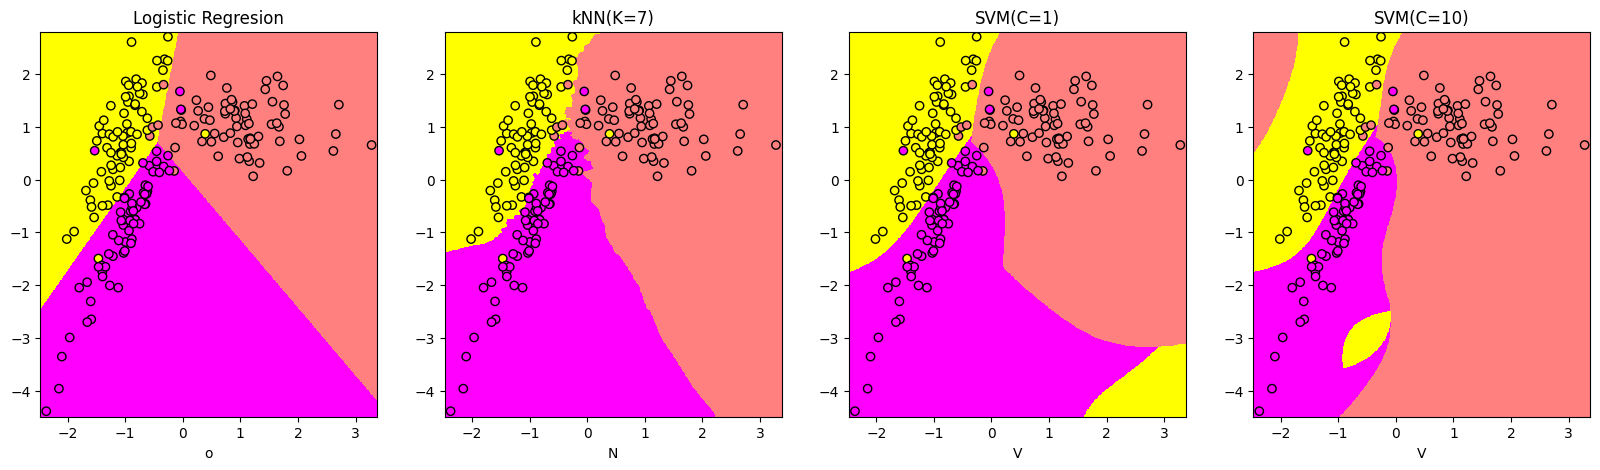

In [13]:
models = [ LogisticRegression() , kNN(n_neighbors=7) , SVC(kernel='rbf',C=1),SVC(kernel='rbf',C=10) ]

names=["Logistic Regresion","kNN(K=7)","SVM(C=1)","SVM(C=10)"]

_, axes = plt.subplots(1,len(names), figsize = (5*len(names),5))
predictions = {}

# fit the models
for clf,name,ax in  zip(models,names,axes):
    #
    clf.fit( X_train , y_train )
    predictions[name]= pred=clf.predict(X_test)

    # Plot everything
    Fronteras(X_test,y_test,0.1,clf,name, ax=ax)
    ax.set_title(name)


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.935  	   0.935  	   0.935  	   0.935  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.945  	   0.945  	   0.945  	   0.945  	
########----- Results for Figure(1600x400) -----########
-- Acc --	 -- Prec --	 -- Rec --	 -- F1 --  
  0.950  	   0.950  	   0.950  	   0.950  	


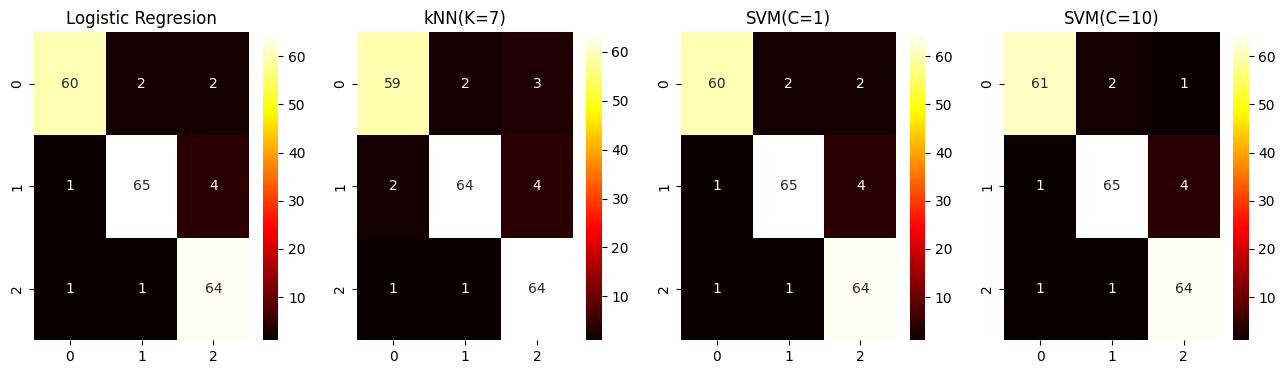

In [15]:
_, axes = plt.subplots(1, len(names) , figsize = (4*len(names),4))

# Compute metrics - plot confusion matrix
for name,ax in zip(names,axes) :
  print ("########----- Results for {0} -----########".format( _ ))
  accuracy = accuracy_score( y_test , predictions[name] )
  precision = precision_score( y_test , predictions[name] , average = "micro")
  recall = recall_score( y_test , predictions[name] , average = "micro")
  f1 = f1_score( y_test , predictions[name] , average = "micro")
  cm = confusion_matrix( y_test , predictions[name] )
  ##--------------
  print("-- Acc --\t -- Prec --\t -- Rec --\t -- F1 --  ")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t   {3:.3f}  \t".format(accuracy, precision, recall, f1))
  sns.heatmap(cm, cmap = "hot", annot = True, ax = ax )
  ax.set_title(name)

## En datos reales

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

# import classifiers
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as kNN

(1797, 64)


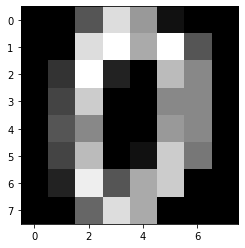

In [ ]:
digits = load_digits()
print(digits.data.shape)

plt.imshow(digits.images[0].reshape(8,8), cmap="gray")

Evalúe los distintos algoritmos entrenando con esta base de datos.

# Regression

In [16]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_regression

# import classifiers
from sklearn.linear_model import LinearRegression

# Import validation
from sklearn.model_selection import train_test_split

(1000, 1) (1000,) (800, 1) (800,) (200, 1) (200,)


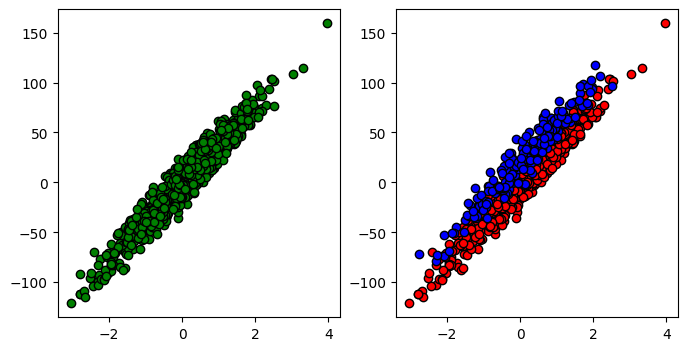

In [26]:
X, y = make_regression(n_samples = 1000, n_features = 1 , noise = 10 , random_state = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


np.random.seed(0)
y_test = y_test + np.random.normal(len(y_test)) * 0.1

print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# Plot train / test data
_,axes=plt.subplots(1,2,figsize=(8,4))
ax.scatter(X,y,c='g',edgecolor='k')
axes[0].scatter(X,y,c='g',edgecolor='k')
axes[1].scatter(X_train,y_train,c='r',edgecolor='k')
axes[1].scatter(X_test,y_test,c='b',edgecolor='k')

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
# Train a linear regression

linear_regression =LinearRegression()
linear_regression.fit(X_train,y_train)
predictions=linear_regression.predict(X_test)
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
print("MAE= {0}".format(mae))
print("MSE= {0}".format(mse))


MAE= 20.324312103675606
MSE= 513.3241384448828


## Metricas de desempeño

Módulo de [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [ ]:
# Compute MAE and MSE